### draft notebook

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.subplots as sp

### Univariate descriptive statistical analysis

In [79]:
# Parameters for the normal distribution
mean_height = 170  # Mean height in centimeters
std_dev = 8        # Standard deviation in centimeters
sample_size = 1000  # Number of samples

# Generating random samples from a normal distribution
height_samples = np.random.normal(mean_height, std_dev, sample_size)

-----

In [80]:
result = scipy.stats.describe(height_samples, ddof=1, bias=False)

In [81]:
df_summary_stats = pd.DataFrame({'count': result.nobs,
                                 'mean': result.mean,
                                 'std': np.sqrt(result.variance),
                                 'var': result.variance,
                                 'min': result.minmax[0],
                                 'max': result.minmax[1],
                                 'ske': result.skewness,
                                 'kurt': result.kurtosis,
                                 '25%': [np.percentile(height_samples, 25)],
                                 '50%': np.median(height_samples),
                                 '75%': [np.percentile(height_samples, 75)]})

In [82]:
df_summary_stats

,count,mean,std,var,min,max,ske,kurt,25%,50%,75%
0,1000,170.519315,8.069707,65.120178,142.788999,201.303303,-0.000519,0.102115,165.310853,170.441795,176.268947


In [17]:
# Create a pandas DataFrame from height_samples numpy array
df = pd.DataFrame({'Height': height_samples})

In [19]:
df.describe()

,Height
count,100.000000
mean,170.505358
std,8.270061
min,152.058298
25%,164.969597
50%,169.795130
75%,175.717161
max,191.408501


---

### Visualization

#### matplotlib

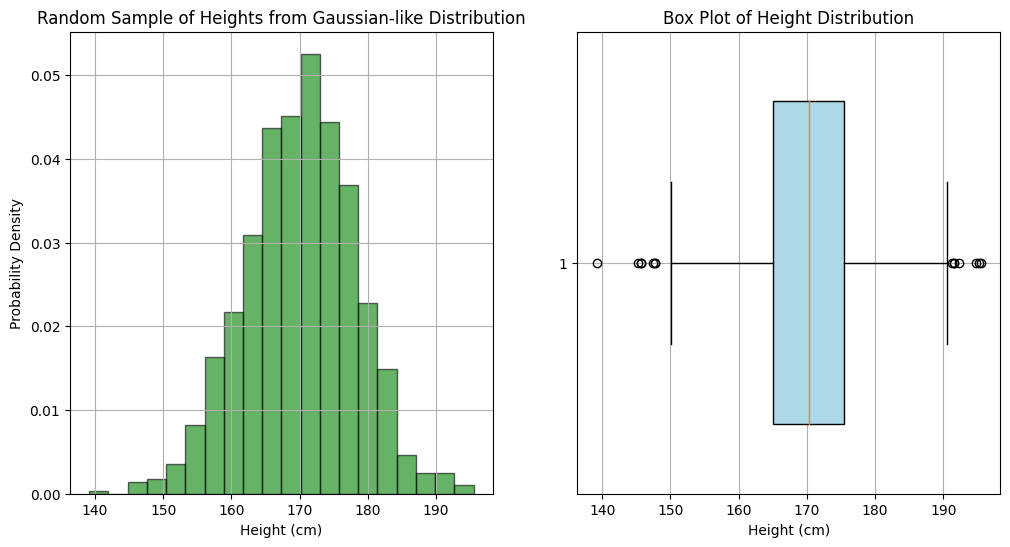

In [78]:
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram
ax1.hist(height_samples, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Probability Density')
ax1.set_title('Random Sample of Heights from Gaussian-like Distribution')
ax1.grid(True)

# Plot box plot
ax2.boxplot(height_samples, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightblue'))
ax2.set_xlabel('Height (cm)')
ax2.set_title('Box Plot of Height Distribution')
ax2.grid(True)

plt.show()

#### seaborn

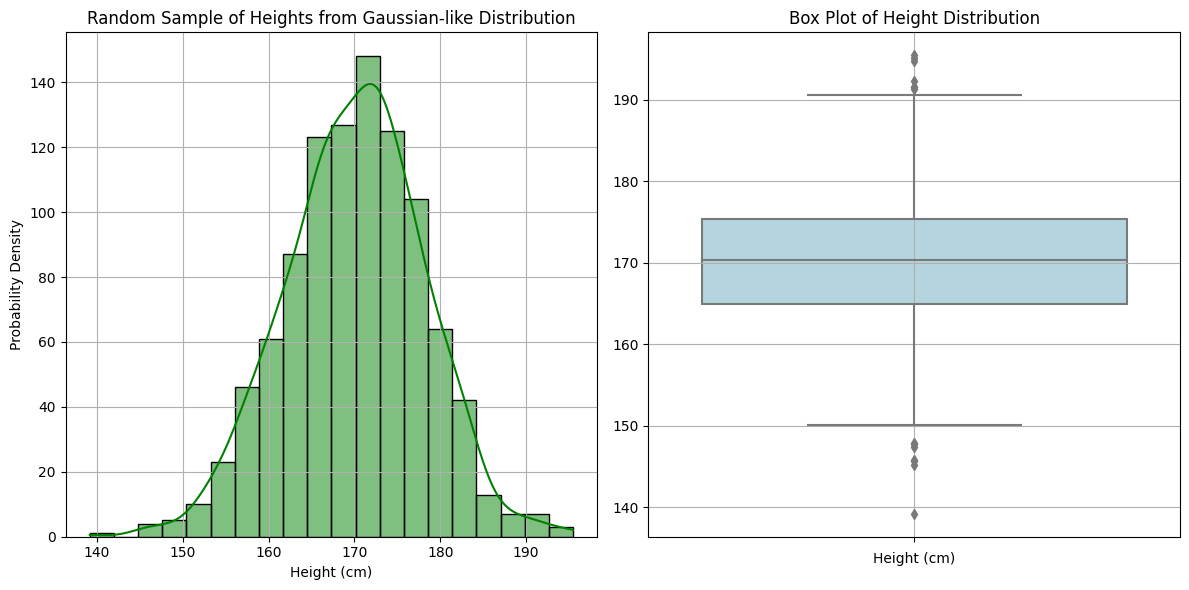

In [59]:
# Create side-by-side plots using seaborn
plt.figure(figsize=(12, 6))

# Plot histogram using seaborn
plt.subplot(1, 2, 1)
sns.histplot(height_samples, bins=20, kde=True, color='g')
plt.xlabel('Height (cm)')
plt.ylabel('Probability Density')
plt.title('Random Sample of Heights from Gaussian-like Distribution')
plt.grid(True)

# Plot box plot using seaborn
plt.subplot(1, 2, 2)
sns.boxplot(y=height_samples, color='lightblue')
plt.xlabel('Height (cm)')
plt.title('Box Plot of Height Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

#### plotly

In [77]:
# Create two separate figures side by side using plotly subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Histogram', 'Box Plot'])

# Add histogram trace to the first subplot with customized edge color
fig.add_trace(go.Histogram(x=height_samples, nbinsx=30, marker_color='green', opacity=0.6,
                           marker_line_color='black', marker_line_width=1),
              row=1, col=1)
fig.update_xaxes(title_text='Height (cm)', row=1, col=1)
fig.update_yaxes(title_text='Probability Density', row=1, col=1)


# Add box plot trace to the second subplot
fig.add_trace(go.Box(y=height_samples, boxpoints=None, jitter=0, pointpos=0),
              row=1, col=2)
fig.update_xaxes(title_text='Height (cm)', row=1, col=2)
fig.update_yaxes(title_text='', row=1, col=2)

# Update layout for both subplots
fig.update_layout(title_text='Random Sample of Heights from Gaussian-like Distribution',
                  showlegend=False,
                  width=1200,  # Set width of the figure
                  height=600   # Set height of the figure
                 )


fig.show()

In [107]:
import numpy as np
import pandas as pd
from scipy import stats

# Parameters
mean_height = 170
std_dev = 40
sample_size = 50
n = 50  # Number of runs

# Initialize an empty list to store statistics
summary_stats_list = []

# Generate n samples and calculate statistics
for i in range(n):
    height_samples = np.random.normal(mean_height, std_dev, sample_size)
    result = stats.describe(height_samples)
    summary_stats = {
        'count': result.nobs,
        'mean': result.mean,
        'std': np.sqrt(result.variance),
        'var': result.variance,
        'min': result.minmax[0],
        'max': result.minmax[1],
        'ske': result.skewness,
        'kurt': result.kurtosis,
        '25%': np.percentile(height_samples, 25),
        '50%': np.median(height_samples),
        '75%': np.percentile(height_samples, 75)
    }
    summary_stats_list.append(summary_stats)

# Create DataFrame from the list of statistics
df_summary_stats = pd.DataFrame(summary_stats_list)

In [108]:
#df_summary_stats

In [109]:
# Build a distribution histogram of the 'mean' column
fig = go.Figure()

fig.add_trace(go.Histogram(x=df_summary_stats['mean'], nbinsx=20, marker_color='green', opacity=0.6,
                           marker_line_color='black', marker_line_width=1))

fig.update_layout(title_text='Distribution of Mean Heights',
                  xaxis_title='Mean Height (cm)',
                  yaxis_title='Frequency')

# Set the minimum and maximum limits for the x-axis
fig.update_xaxes(range=[mean_height - 3*std_dev, mean_height + 3*std_dev])

fig.show()